# 1. Load and Explore the Dataset

In [358]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
df = pd.read_csv("data.csv")


### Data Exploration

In [360]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1        

In [361]:
# Display the basic information about the dataset (column names, non-null counts, data types)
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: f

In [362]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [363]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(7050, 16)


In [364]:
# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object


### Data Cleaning

In [365]:
df.shape


(7050, 16)

In [366]:
#dropping empty colmns
df=df.drop(labels=["Column1","Column2","Column3","Column4"], axis=1)
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [367]:
#dropping duplicated rows
## Get duplicate rows
duplicates = df.duplicated()
df[duplicates].sort_values(by="status_id")
print("duplicated rows:")
print(df[duplicates])
## Drop duplicates
df.drop_duplicates(inplace = True,keep="first")

duplicated rows:
                             status_id status_type status_published  \
6221  819700534875473_1002372733274918       video   6/10/2018 3:43   
6222  819700534875473_1001982519980606       photo   6/9/2018 22:53   
6223  819700534875473_1000607730118085       photo    6/7/2018 7:01   
6224   819700534875473_999880033524188      status    6/6/2018 2:20   
6225   819700534875473_998824716963053       photo    6/4/2018 6:57   
6226   819700534875473_997075427137982      status    6/1/2018 0:35   
6227   819700534875473_995933077252217       photo   5/30/2018 6:33   
6228   819700534875473_995839410594917       photo   5/30/2018 2:39   
6229   819700534875473_995218893990302      status   5/29/2018 4:39   
6230   819700534875473_993975437447981       photo   5/27/2018 1:31   
6231   819700534875473_993602007485324      status   5/26/2018 8:08   
6232   819700534875473_993049450873913       photo   5/25/2018 7:56   
6233   819700534875473_991757311003127       photo   5/23/20

In [368]:
# Display the number of unique values per column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64


In [369]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {len(unique_values)} unique value")
    print(unique_values)
    print("\n")  

Unique values in column 'status_id': 6997 unique value
['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']


Unique values in column 'status_type': 4 unique value
['video' 'photo' 'link' 'status']


Unique values in column 'status_published': 6913 unique value
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']


Unique values in column 'num_reactions': 1067 unique value
[529 150 227 ... 558 570 415]


Unique values in column 'num_comments': 993 unique value
[  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   

### main features in the dataset

In [370]:
# Display the correlation matrix (for numerical data)
print("\nCorrelation matrix:")
numerical_df = df.drop(["status_id","status_type","status_published"], axis=1)
print(numerical_df.corr())


Correlation matrix:
               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.156190    0.259640   0.994672   0.310645   
num_comments        0.156190      1.000000    0.640536   0.105934   0.521320   
num_shares          0.259640      0.640536    1.000000   0.179664   0.820284   
num_likes           0.994672      0.105934    0.179664   1.000000   0.212715   
num_loves           0.310645      0.521320    0.820284   0.212715   1.000000   
num_wows            0.261694      0.163506    0.409803   0.200015   0.510148   
num_hahas           0.179657      0.325064    0.399864   0.123129   0.507899   
num_sads            0.082094      0.257545    0.218628   0.057110   0.226574   
num_angrys          0.136064      0.239557    0.332355   0.096276   0.394818   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.261694   0.179657  0.082094    0.136064  
num_comments   0.163506   0.325064  0.257545    0.239557  
n

In [371]:
new_df=df.drop(["status_id","status_published","status_type"],axis=1)

# 2. Preprocess the Data

### Standardizing the data

In [372]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)  

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(df_scaled)
reduced_data


array([[ 2.26417905, -0.07891973],
       [-0.62979816,  0.0562892 ],
       [ 0.10038237, -0.03813099],
       ...,
       [-0.80860801, -0.37194337],
       [-0.27070347,  0.58074218],
       [-0.80040715, -0.32336044]])

### dimensionality reduction

In [373]:
###T-SNE 
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
principalDf =tsne.fit_transform(reduced_data)
finalDf = pd.DataFrame(data = principalDf, columns = ['TSNE component 1', 'TSNE component 2'])
print("the df shape:")
print(finalDf.shape)
print(finalDf.head())
finalDf.isna().sum()

the df shape:
(6999, 2)
   TSNE component 1  TSNE component 2
0         46.037979        -21.062323
1         24.534838         41.841400
2         24.550703          2.422858
3          9.739626         53.247734
4         33.291092         21.133486


TSNE component 1    0
TSNE component 2    0
dtype: int64

In [374]:
###PCA 
"""from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(reduced_data)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['status_type']]], axis = 1)
print(finalDf.shape)
finalDf.isna().sum()"""

"from sklearn.decomposition import PCA\n\npca = PCA(n_components=2)\n\nprincipalComponents = pca.fit_transform(reduced_data)\n\nprincipalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])\nfinalDf = pd.concat([principalDf, df[['status_type']]], axis = 1)\nprint(finalDf.shape)\nfinalDf.isna().sum()"

### Applying K-means Clustering with k=4

In [375]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
labels = model.fit_predict(finalDf)
df_result = pd.DataFrame({'labels': labels, 'types': df["status_type"]})
ct = pd.crosstab(df_result['labels'],df_result['types'])
print(ct)

types   link  photo  status  video
labels                            
0          2    601      53   1351
1         18   1112      20    402
2         18   1419      65    212
3         25   1112     221    368


# 3. Apply K-means Clustering

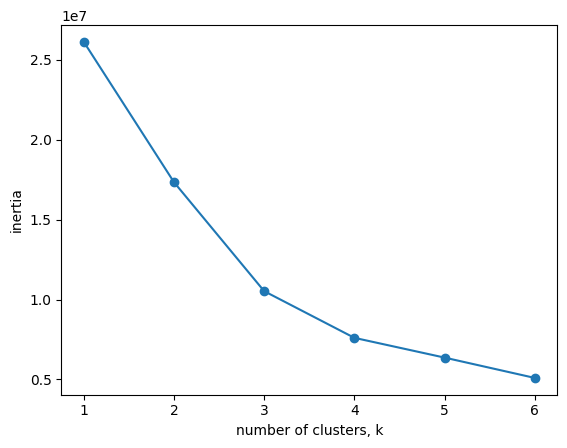

In [376]:
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(finalDf)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [377]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
labels = model.fit_predict(finalDf)
df_result = pd.DataFrame({'labels': labels, 'types': df["status_type"]})
ct = pd.crosstab(df_result['labels'],df_result['types'])
print(ct)


types   link  photo  status  video
labels                            
0         22   1191     220    425
1         17   1106      21    329
2         21   1439      76    230
3          3    508      42   1349


In [385]:
finalDf['cluster'] = df_result["labels"]
finalDf


,TSNE component 1,TSNE component 2,cluster
0,46.037979,-21.062323,3.0
1,24.534838,41.841400,0.0
2,24.550703,2.422858,3.0
3,9.739626,53.247734,0.0
4,33.291092,21.133486,0.0
...,...,...,...
6994,-5.749324,57.017822,0.0
6995,-21.314190,18.818098,0.0
6996,-10.141106,-72.634125,3.0
6997,63.704746,20.327728,0.0


# 4. Interpret the Results

ValueError: perplexity must be less than n_samples

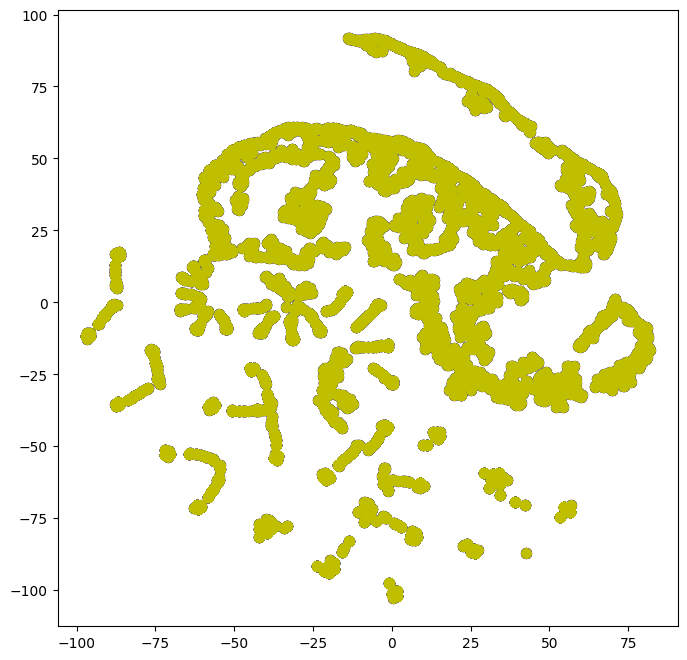

In [379]:
colors = ['r', 'g', 'b', 'y']
plt.figure(figsize=(8, 8))

# Plot each cluster
for i in range(4):  # Assuming 4 clusters
    cluster_data = finalDf[finalDf['cluster'] == i]
    plt.scatter(finalDf['TSNE component 1'],
                finalDf['TSNE component 2'],
                c=colors[i], label=f'Cluster {i}', s=50)

# Plot centroids in t-SNE space
centroids_tsne = tsne.fit_transform(model.cluster_centers_)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters and Centroids in t-SNE Space')
plt.legend()
plt.grid()
plt.show()

There is no clear distinctions between the clusters !

In [381]:
#Plotting the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(data=finalDf,x='TSNE component 1',y='TSNE component 2',hue='',palette='viridis',s=100,alpha=0.7)


plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x1000 with 0 Axes>